In [244]:
#import urllib2
from bs4 import BeautifulSoup
import requests
import string
import re
import pandas as pd
from  pandas import DataFrame as DF


In [276]:
# source http://www.insee.fr/fr/themes/tableau.asp?reg_id=99&ref_id=CMRTEF01213
PopDep=pd.read_csv('CMRTEF01213a.csv')
PopDep=PopDep.dropna(how='any')
PopDep=PopDep.rename(columns={'Estimation de population au janvier 2014 en Milliers':'Pop en milliers'})
PopDep=PopDep.rename(columns={'Département':'Departement'})
PopDep=PopDep[PopDep.Departement != 'France métropolitaine'].sort(columns='Departement')


PopDep=PopDep.dropna(how='any')
PopDep


E:\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Departement,Pop en milliers,Variation relative annuelle 2007-2014 en %
0,01 Ain,627.4,1.3
1,02 Aisne,540.4,0.1
2,03 Allier,342.6,0
3,04 Alpes-de-Hte-Pce,162.4,0.6
4,05 Hautes-Alpes,141.9,1
5,06 Alpes-Maritimes,"1,083.30",0
6,07 Ardèche,321.3,0.5
7,08 Ardennes,282,-0.1
8,09 Ariège,152.9,0.4
9,10 Aube,306.5,0.3


In [277]:

PopDep=PopDep.rename(columns={'Pop en milliers':'Pop_par_centaines'})
PopDep['Pop_par_centaines']=PopDep['Pop_par_centaines'].str.replace(',','').str.replace('.','').astype('float')
print (type(PopDep))
PopDep

<class 'pandas.core.frame.DataFrame'>


,Departement,Pop_par_centaines,Variation relative annuelle 2007-2014 en %
0,01 Ain,6274,1.3
1,02 Aisne,5404,0.1
2,03 Allier,3426,0
3,04 Alpes-de-Hte-Pce,1624,0.6
4,05 Hautes-Alpes,1419,1
5,06 Alpes-Maritimes,108330,0
6,07 Ardèche,3213,0.5
7,08 Ardennes,282,-0.1
8,09 Ariège,1529,0.4
9,10 Aube,3065,0.3


In [311]:
# honoraire par specialite et par departement
HDF=pd.read_csv('Honoraires_totaux_des_professionnels_de_sante_par_departement_en_2013.csv')
# et on veut trier sur le depratement
HDF=HDF.sort(columns='DEPARTEMENT')
HDF.head()

E:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,SPECIALISTES,DEPARTEMENT,EFFECTIFS,HONORAIRES SANS DEPASSEMENT (euros),DEPASSEMENTS (euros),FRAIS DE DEPLACEMENTS (euros),HONORAIRES TOTAUX (euros),NOMBRE DE DEPASSEMENTS,DEPASSEMENT MOYEN (euros)
0,02- Anesthésie-réanimation chirurgicale,01- Ain,17,"4,329,488","1,879,396",0,"6,208,884","27,995",67
7519,11- Oto-rhino-laryngologie,01- Ain,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8343,17- Neuropsychiatrie,01- Ain,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9270,35- Néphrologie,01- Ain,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2884,73- Oncologie médicale,01- Ain,0,0,0,0,0,0,0


In [264]:
# on ne s'interresse qu'aux "Specialité, région, nombre de depassements"
HDF2=HDF.drop(['HONORAIRES SANS DEPASSEMENT (euros)','DEPASSEMENTS (euros)','FRAIS DE DEPLACEMENTS (euros)','HONORAIRES TOTAUX (euros)','DEPASSEMENT MOYEN (euros)'],axis=1)

HDF2['NOMBRE DE DEPASSEMENTS']=HDF2['NOMBRE DE DEPASSEMENTS'].str.replace(',','')

HDF2.head()

,SPECIALISTES,DEPARTEMENT,EFFECTIFS,NOMBRE DE DEPASSEMENTS
0,02- Anesthésie-réanimation chirurgicale,01- Ain,17,27995
7519,11- Oto-rhino-laryngologie,01- Ain,NaN,NaN
8343,17- Neuropsychiatrie,01- Ain,NaN,NaN
9270,35- Néphrologie,01- Ain,NaN,NaN
2884,73- Oncologie médicale,01- Ain,0,0


In [273]:
# on ne garde que des données connues
HDF3=HDF2.loc[(HDF2['NOMBRE DE DEPASSEMENTS']!='nc')]
HDF3=HDF3.dropna(how='any')
HDF3

,SPECIALISTES,DEPARTEMENT,EFFECTIFS,NOMBRE DE DEPASSEMENTS
0,02- Anesthésie-réanimation chirurgicale,01- Ain,17,27995
2884,73- Oncologie médicale,01- Ain,0,0
3914,45- Chirurgie maxillo-faciale et stomatologie,01- Ain,0,0
4738,"TOTAL PSYCHIATRIE et NEUROPSYCHIATRIE (75, 33...",01- Ain,17,6890
5356,TOTAL MEDECINS,01- Ain,701,485412
3811,15- Ophtalmologie,01- Ain,23,89204
2266,77- Obstétrique,01- Ain,0,0
1133,10- Neurochirurgie,01- Ain,0,0
5253,TOTAL SPECIALISTES,01- Ain,255,378939
309,03- Pathologie cardio-vasculaire,01- Ain,16,11550


In [269]:
# on fait le calcul sur le nombre total de spécialistes dans un dépatement
HDF3['NOMBRE DE DEPASSEMENTS']=HDF3['NOMBRE DE DEPASSEMENTS'].astype('float')
HDF3['EFFECTIFS']=HDF3['EFFECTIFS'].str.replace(',','').astype('float')
print (len(HDF3))
HDF4=HDF3.groupby(['DEPARTEMENT']).sum()
HDF4=HDF4.reset_index().sort()
HDF4.head(200)
#print(type(HDF4))
#print (len(HDF4))

3297


E:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: sort(....) is deprecated, use sort_index(.....)


,DEPARTEMENT,EFFECTIFS,NOMBRE DE DEPASSEMENTS
0,01- Ain,1571,1497791
1,02- Aisne,1634,1040258
2,03- Allier,1251,854580
3,04- Alpes-Hte-Provence,540,304211
4,05- Hautes-Alpes,496,157081
5,06- Alpes-Maritimes,8181,8446393
6,07- Ardèche,1023,825345
7,08- Ardennes,694,284624
8,09- Ariège,370,126679
9,10- Aube,980,727719


In [302]:
PopDep

,Departement,Pop_par_centaines,Variation relative annuelle 2007-2014 en %
0,01 Ain,6274,1.3
1,02 Aisne,5404,0.1
2,03 Allier,3426,0
3,04 Alpes-de-Hte-Pce,1624,0.6
4,05 Hautes-Alpes,1419,1
5,06 Alpes-Maritimes,108330,0
6,07 Ardèche,3213,0.5
7,08 Ardennes,282,-0.1
8,09 Ariège,1529,0.4
9,10 Aube,3065,0.3


In [317]:
#concatene les deux df
DFC=pd.concat([HDF4,PopDep],axis=1)
#DFC=DFC.dropna(how='any')
DFC=DFC.head(100)
DFC

,DEPARTEMENT,EFFECTIFS,NOMBRE DE DEPASSEMENTS,Departement,Pop_par_centaines,Variation relative annuelle 2007-2014 en %
0,01- Ain,1571,1497791,01 Ain,6274,1.3
1,02- Aisne,1634,1040258,02 Aisne,5404,0.1
2,03- Allier,1251,854580,03 Allier,3426,0
3,04- Alpes-Hte-Provence,540,304211,04 Alpes-de-Hte-Pce,1624,0.6
4,05- Hautes-Alpes,496,157081,05 Hautes-Alpes,1419,1
5,06- Alpes-Maritimes,8181,8446393,06 Alpes-Maritimes,108330,0
6,07- Ardèche,1023,825345,07 Ardèche,3213,0.5
7,08- Ardennes,694,284624,08 Ardennes,282,-0.1
8,09- Ariège,370,126679,09 Ariège,1529,0.4
9,10- Aube,980,727719,10 Aube,3065,0.3


In [318]:
# densite de spécialiste par habitants
DFC['Densite']=DFC['EFFECTIFS']/DFC['Pop_par_centaines']
DFC

,DEPARTEMENT,EFFECTIFS,NOMBRE DE DEPASSEMENTS,Departement,Pop_par_centaines,Variation relative annuelle 2007-2014 en %,Densite
0,01- Ain,1571,1497791,01 Ain,6274,1.3,0.250398
1,02- Aisne,1634,1040258,02 Aisne,5404,0.1,0.302369
2,03- Allier,1251,854580,03 Allier,3426,0,0.365149
3,04- Alpes-Hte-Provence,540,304211,04 Alpes-de-Hte-Pce,1624,0.6,0.332512
4,05- Hautes-Alpes,496,157081,05 Hautes-Alpes,1419,1,0.349542
5,06- Alpes-Maritimes,8181,8446393,06 Alpes-Maritimes,108330,0,0.075519
6,07- Ardèche,1023,825345,07 Ardèche,3213,0.5,0.318394
7,08- Ardennes,694,284624,08 Ardennes,282,-0.1,2.460993
8,09- Ariège,370,126679,09 Ariège,1529,0.4,0.241988
9,10- Aube,980,727719,10 Aube,3065,0.3,0.319739


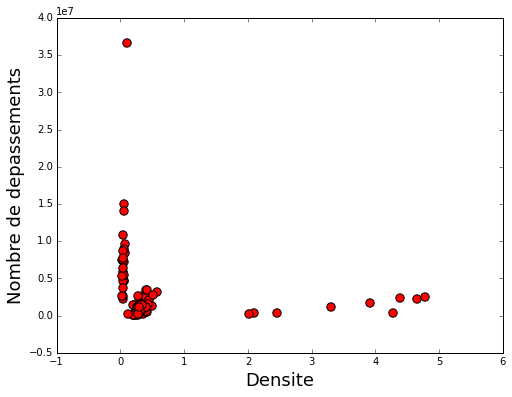

In [322]:
# graphe de répartition densité de spécialiste  par rapport au nombre de depassements honoraires
%matplotlib inline
import matplotlib.pyplot as plt

y=DFC[['NOMBRE DE DEPASSEMENTS']]
x=DFC[['Densite']]
fig=plt.figure(figsize=(8,6))
plt.ylabel(r'Nombre de depassements', fontsize=18)
plt.xlabel(r'Densite', fontsize=18)


plt.scatter(x, y, color='red', s=70, edgecolor='black',
           marker='o') #faceted=True)
plt.show()


On constate que le nombre de dépassemnt n'est pas en fonction de la densité.
